In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [1]:
from skimage import segmentation, feature, filters, io, exposure, morphology
import scipy
import cv2

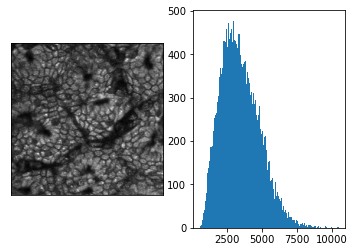

In [3]:
fname = '15-07-31_M526-D3-4x4_PMT - PMT [PMT2] _C01_xyz Stage Z0006.ome.tif'
folder = 'MBT/180918_M526-D3-4x4_15-07-31'
img = io.imread(f'{folder}/{fname}')[50:250,50:250]
# fig = figure(figsize=(10,10))
subplot(121)
imshow(img,cmap='gray')
xticks([]), yticks([]);
subplot(122)
hist(img.flatten(), bins=256);
show()

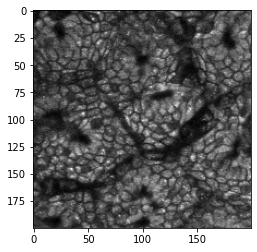

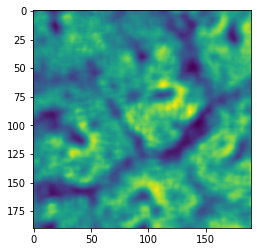

In [24]:
imshow(img, cmap='gray'), show()
disk = morphology.disk(5).astype(float64)
corr = scipy.signal.correlate2d(img, disk, mode='valid')
imshow(corr)

(<AxesSubplot:>,
 <matplotlib.image.AxesImage at 0x7fc31a1b9650>)

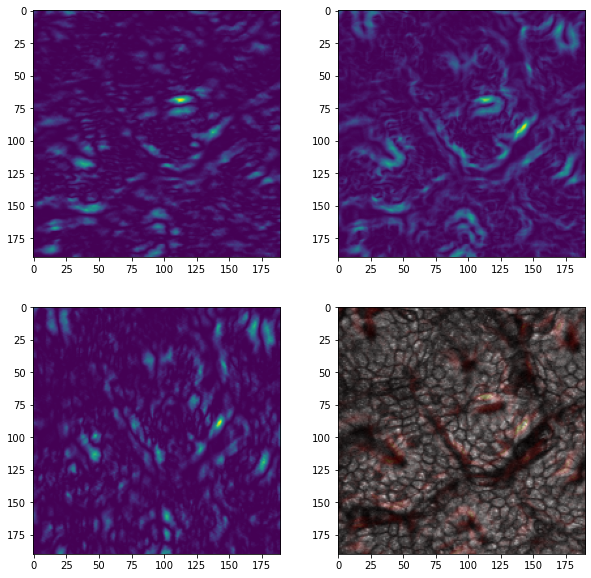

In [26]:
fig = figure(figsize=(10,10))
grad_power = 1
dx = corr.copy()
dy = corr.copy()
for _ in range(grad_power):
    dx = gradient(dx, axis=0)
    dy = gradient(dy, axis=1)

dx = dx**2
dy = dy**2

subplot(221), imshow(dx)
subplot(223), imshow(dy)
subplot(222), imshow(dx + dy)
subplot(224), imshow(img, cmap='gray'), imshow(dx + dy, cmap='hot', alpha=0.2)